# Air pollution estimation

In [2]:
import pandas as pd
import numpy as np
import os
import matplotlib.pyplot as plt

from utils import *

datasets_folder = './datasets'

## Dataframe creation

### Air pollution Dataset

In [3]:
air_pollution_dataset = os.path.join(datasets_folder,'pollution/pollution.csv')

air_pollution_df = pd.read_csv(air_pollution_dataset, sep=';')
air_pollution_df.head(3)

,COD_STAZ,AGENTE,DATA_INIZIO,DATA_FINE,VALORE,UM
0,VIA CHIARINI,O3 (OZONO),2024-07-30T17:01:00+02:00,2024-07-30T18:00:00+02:00,117.0,ug/m3
1,VIA CHIARINI,O3 (OZONO),2024-07-31T13:01:00+02:00,2024-07-31T14:00:00+02:00,162.0,ug/m3
2,VIA CHIARINI,O3 (OZONO),2024-08-01T01:01:00+02:00,2024-08-01T02:00:00+02:00,74.0,ug/m3


### Traffic Dataset

In [4]:
traffic_folder = os.path.join(datasets_folder,'traffic')

readings_df = merge_csv_to_dataframe(os.path.join(traffic_folder, 'readings'), sep=';')
accuracies_df = merge_csv_to_dataframe(os.path.join(traffic_folder, 'accuracies'), sep=';')

Merged 6 CSV files
Merged 6 CSV files


In [5]:
readings_df.head(3)

,data,codice spira,00:00-01:00,01:00-02:00,02:00-03:00,03:00-04:00,04:00-05:00,05:00-06:00,06:00-07:00,07:00-08:00,...,stato,codimpsem,direzione,angolo,longitudine,latitudine,geopoint,ID_univoco_stazione_spira,giorno settimana,Giorno della settimana
0,2023-12-12,3.17 3.18 6 2,33,23,17,10,26,53,93,292,...,A,401.0,NaN,2.0,11.348231,44.521548,"44.5215481671945, 11.348230662166",532.0,Martedì,NaN
1,2023-12-12,3.17 3.19 2 3,48,18,12,15,42,101,194,592,...,A,401.0,NaN,182.0,11.348157,44.521549,"44.5215485863886, 11.3481566444247",534.0,Martedì,NaN
2,2023-12-12,3.18 0.127 4 1,12,4,3,6,3,26,29,70,...,A,213.0,O,70.0,11.349238,44.525276,"44.5252762330901, 11.3492381515612",535.0,Martedì,NaN


In [6]:
accuracies_df.head(3)

,data,codice spira,00:00-01:00,01:00-02:00,02:00-03:00,03:00-04:00,04:00-05:00,05:00-06:00,06:00-07:00,07:00-08:00,...,14:00-15:00,15:00-16:00,16:00-17:00,17:00-18:00,18:00-19:00,19:00-20:00,20:00-21:00,21:00-22:00,22:00-23:00,23:00-24:00
0,2019-01-14,4.30 4.96 4 1,100%,100%,100%,100%,100%,100%,100%,100%,...,100%,100%,100%,100%,100%,100%,100%,100%,100%,100%
1,2019-01-14,4.31 4.29 6 1,100%,100%,100%,95%,58%,87%,100%,100%,...,83%,91%,100%,100%,91%,79%,95%,87%,95%,100%
2,2019-01-14,4.31 4.39 4 1,100%,100%,100%,100%,66%,83%,100%,100%,...,100%,100%,100%,100%,100%,100%,100%,100%,100%,100%


### Weather Dataset

In [7]:
weather_folder = os.path.join(datasets_folder,'weather')

weather_df = merge_csv_to_dataframe(weather_folder)
weather_df

Merged 6 CSV files


,PragaTime,TAVG,PREC,RHAVG,RAD,W_SCAL_INT,W_VEC_DIR,W_VEC_INT,LEAFW,ET0
0,2021-01-01 00:00:00,4.7,0.3,87.0,0.0,1.8,322.3,1.8,1.0,0.0
1,2021-01-01 01:00:00,4.2,0.1,87.1,0.0,0.9,339.6,0.8,1.0,0.0
2,2021-01-01 02:00:00,4.3,0.0,88.1,0.0,0.5,249.0,0.5,1.0,0.0
3,2021-01-01 03:00:00,4.2,0.6,90.8,0.0,0.9,68.7,0.4,1.0,0.0
4,2021-01-01 04:00:00,4.1,0.1,90.4,0.0,1.2,160.4,0.9,1.0,0.0
...,...,...,...,...,...,...,...,...,...,...
52580,2023-12-31 19:00:00,13.4,0.0,69.2,0.0,6.2,207.2,6.0,0.0,0.0
52581,2023-12-31 20:00:00,8.6,0.0,92.9,0.0,5.6,277.4,5.5,0.0,0.0
52582,2023-12-31 21:00:00,8.8,0.6,96.5,0.0,2.6,240.3,2.5,1.0,0.0
52583,2023-12-31 22:00:00,12.2,0.2,85.9,0.0,5.9,218.4,5.8,1.0,0.0


## Data exploration

In [8]:
giardini_df = air_pollution_df[air_pollution_df['COD_STAZ'] == 'GIARDINI MARGHERITA']
san_felice_df = air_pollution_df[air_pollution_df['COD_STAZ'] == 'PORTA SAN FELICE']
chiarini_df = air_pollution_df[air_pollution_df['COD_STAZ'] == 'VIA CHIARINI']

In [9]:
air_pollution_df.describe(include='all')

,COD_STAZ,AGENTE,DATA_INIZIO,DATA_FINE,VALORE,UM
count,472619,472619,472619,472619,472607.000000,472619
unique,3,8,52601,52601,NaN,2
top,PORTA SAN FELICE,NO2 (BIOSSIDO DI AZOTO),2022-03-27T03:01:00+02:00,2020-03-29T03:00:00+02:00,NaN,ug/m3
freq,259799,154711,18,18,NaN,420828
mean,NaN,NaN,NaN,NaN,28.426199,NaN
std,NaN,NaN,NaN,NaN,34.394578,NaN
min,NaN,NaN,NaN,NaN,-2.000000,NaN
25%,NaN,NaN,NaN,NaN,2.100000,NaN
50%,NaN,NaN,NaN,NaN,16.000000,NaN
75%,NaN,NaN,NaN,NaN,42.000000,NaN


52601 measurements, 3 different, 8 agents

In [10]:
from datetime import datetime
air_pollution_df['DATA_INIZIO'] = air_pollution_df['DATA_INIZIO'].apply(lambda x: datetime.fromisoformat(x))
air_pollution_df['DATA_FINE'] = air_pollution_df['DATA_FINE'].apply(lambda x: datetime.fromisoformat(x))

In [11]:
np.unique(air_pollution_df['DATA_INIZIO'].apply(lambda x: x.date())).shape

(2192,)

2192 days of measurements

In [12]:
giardini_df['DATA_INIZIO'] = giardini_df['DATA_INIZIO'].apply(lambda x: datetime.fromisoformat(x))
np.unique(giardini_df['DATA_INIZIO'].apply(lambda x: x.date())).shape

/tmp/ipykernel_47322/3908520115.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  giardini_df['DATA_INIZIO'] = giardini_df['DATA_INIZIO'].apply(lambda x: datetime.fromisoformat(x))


(2187,)

2187 days of measurements at giardini margherita

In [13]:
san_felice_df['DATA_INIZIO'] = san_felice_df['DATA_INIZIO'].apply(lambda x: datetime.fromisoformat(x))
np.unique(san_felice_df['DATA_INIZIO'].apply(lambda x: x.date())).shape

/tmp/ipykernel_47322/2495840756.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  san_felice_df['DATA_INIZIO'] = san_felice_df['DATA_INIZIO'].apply(lambda x: datetime.fromisoformat(x))


(2191,)

2191 days of measurements at san felice

In [14]:
chiarini_df['DATA_INIZIO'] = chiarini_df['DATA_INIZIO'].apply(lambda x: datetime.fromisoformat(x))
np.unique(chiarini_df['DATA_INIZIO'].apply(lambda x: x.date())).shape

/tmp/ipykernel_47322/1093406157.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  chiarini_df['DATA_INIZIO'] = chiarini_df['DATA_INIZIO'].apply(lambda x: datetime.fromisoformat(x))


(2190,)

2190 days of measurements at via chiarini

### Agents measurements per station

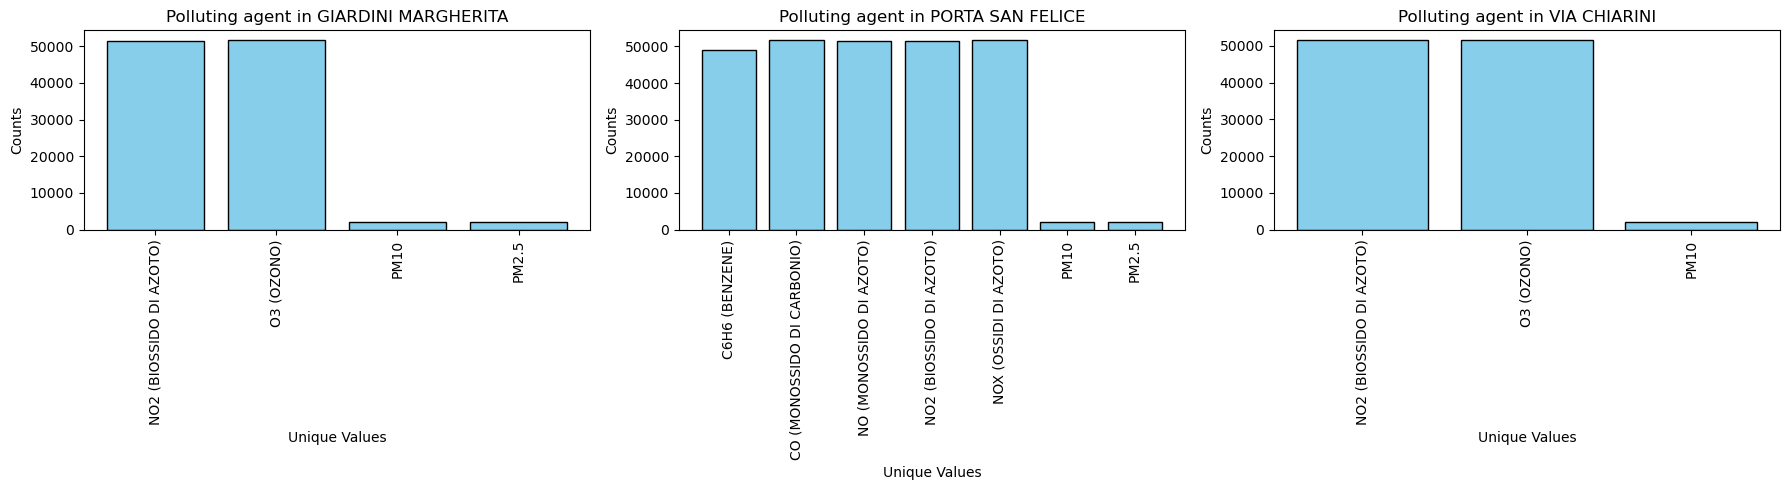

In [15]:
fig, axes = plt.subplots(1, 3, figsize=(18, 5))

for i, df in enumerate([giardini_df, san_felice_df, chiarini_df]):
    val, counts = np.unique(df['AGENTE'], return_counts=True)
    axes[i].bar(val, counts, color='skyblue', edgecolor='black')
    axes[i].set_xlabel('Unique Values')
    axes[i].set_xticks(range(len(val)))
    axes[i].set_xticklabels(val, rotation=90)
    axes[i].set_ylabel('Counts')
    axes[i].set_title(f'Polluting agent in {df["COD_STAZ"].iloc[0]}')

plt.tight_layout()
plt.show()

NO2 and O3 common to all the three stations, maybe good idea to consider just them? or maybe consider just Porta San Felice and use the first 4 agents.

In [ ]:
Other stuff to explore: boh sono le 23:22 sono stanco morto e ieri notte non ho dormito

### Traffic Dataset

### Weather Dataset